In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd
import math
import seaborn as sbn
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np

In [2]:
data = pd.read_csv("zoo.csv")
data.head(4)


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1


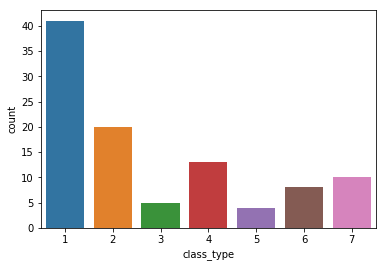

In [3]:
sbn.countplot(data['class_type'],label="Count")

Text(0.5, 1, 'Correlation of attributes')

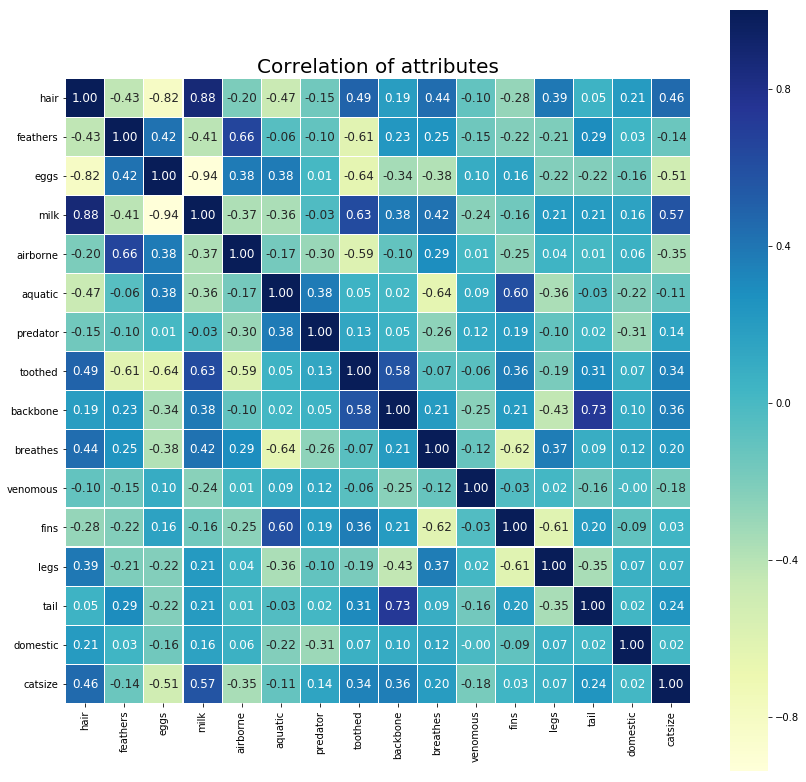

In [4]:
cordata = data.iloc[:,1:-1].corr()
plt.figure(figsize=(14,14))
sbn.heatmap(cordata, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
            cmap="YlGnBu", linewidths=0.1, linecolor='white')
plt.title('Correlation of attributes', y=1, size=20) 

In [5]:

def preprocess(data):
    X = data.iloc[:, 1:17]  # all rows, all the features and no labels
    y = data.iloc[:, 17]  # all rows, label only

    return X, y

In [11]:
X, y = preprocess(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 16) (26, 16) (75,) (26,)


In [16]:
clf = svm.SVC()
clf.fit(X_train, y_train) 

C:\Users\simon\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
clf.score(X_test, y_test)

0.8461538461538461

In [19]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.9230769230769231

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9615384615384616